In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, losses, optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *

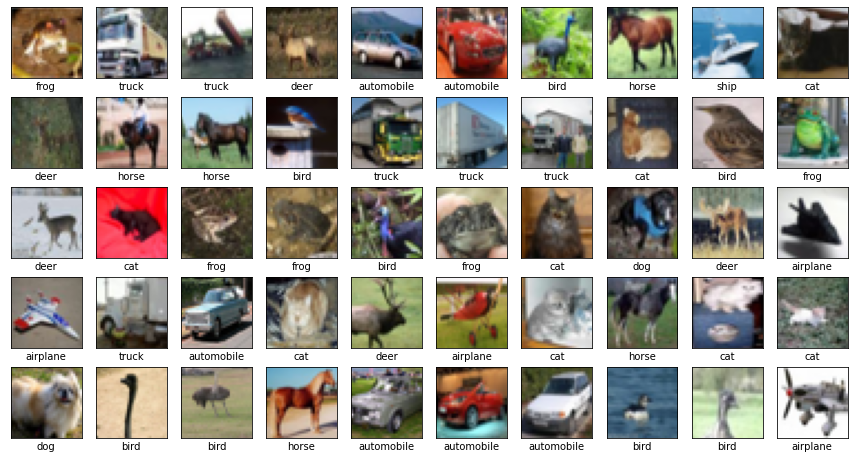

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

CATAGORIES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(CATAGORIES[y_train[i][0]])
plt.show()

In [3]:
#VGG16 = [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"]

model = models.Sequential()
#block1
model.add(layers.Conv2D(64, (3,3),padding = 'same', activation = 'relu',input_shape = (32,32,3)))


#block2
model.add(layers.Conv2D(64, (3,3),padding = 'same', activation = 'relu'))

#block3
model.add(layers.MaxPooling2D(2,2))

#block4
model.add(layers.Conv2D(128, (3,3),padding = 'same', activation = 'relu'))


#block5
model.add(layers.Conv2D(128, (3,3),padding = 'same', activation = 'relu'))

#block6
model.add(layers.MaxPooling2D(2,2))

#block7
model.add(layers.Conv2D(256, (3,3),padding = 'same', activation = 'relu'))


#block8
model.add(layers.Conv2D(256, (3,3),padding = 'same', activation = 'relu'))


#block9
model.add(layers.Conv2D(256, (3,3),padding = 'same', activation = 'relu'))

#block10
model.add(layers.MaxPooling2D(2,2))

#block11
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))


#block12
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))


#block13
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))


#block14
model.add(layers.MaxPooling2D(2,2))

#block15
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))


#block16
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))


#block17
model.add(layers.Conv2D(512, (3,3),padding = 'same', activation = 'relu'))

#block18
model.add(layers.MaxPooling2D(2,2))


#faltten layer
model.add(layers.Flatten())

#dense layer1
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(256,activation = 'relu'))

#dense layer2
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [5]:
sgd = optimizers.SGD(lr = 0.001, decay = 0, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, 
              loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
arr = model.fit(X_train, y_train, epochs=30, batch_size = 64, validation_data=(X_test,y_test))

Epoch 1/30
782/782 [==============================] - 34s 39ms/step - loss: 2.3025 - accuracy: 0.1031 - val_loss: 2.3020 - val_accuracy: 0.1160
Epoch 2/30
782/782 [==============================] - 29s 38ms/step - loss: 2.3017 - accuracy: 0.1210 - val_loss: 2.2996 - val_accuracy: 0.1170
Epoch 3/30
782/782 [==============================] - 29s 37ms/step - loss: 2.2961 - accuracy: 0.1372 - val_loss: 2.2322 - val_accuracy: 0.1758
Epoch 4/30
782/782 [==============================] - 29s 38ms/step - loss: 2.1584 - accuracy: 0.1924 - val_loss: 2.0387 - val_accuracy: 0.2305
Epoch 5/30
782/782 [==============================] - 29s 38ms/step - loss: 1.9763 - accuracy: 0.2405 - val_loss: 1.8368 - val_accuracy: 0.2795
Epoch 6/30
782/782 [==============================] - 29s 37ms/step - loss: 1.8396 - accuracy: 0.2913 - val_loss: 1.7325 - val_accuracy: 0.3459
Epoch 7/30
782/782 [==============================] - 29s 38ms/step - loss: 1.7357 - accuracy: 0.3380 - val_loss: 1.7084 - val_accuracy:

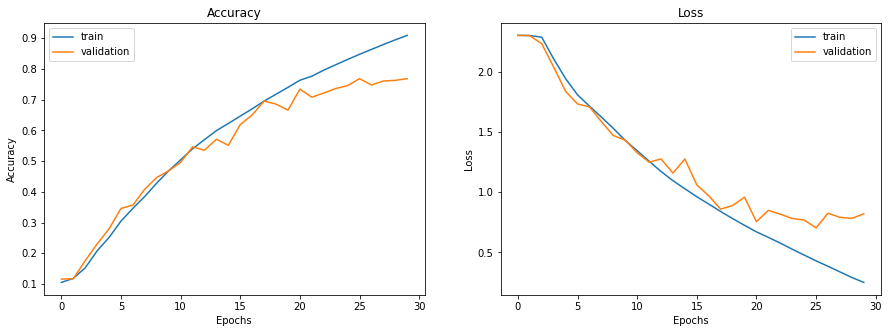

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(arr.history['accuracy'])
plt.plot(arr.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(arr.history['loss'])
plt.plot(arr.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [8]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)
print(test_loss*100, test_accuracy*100)

313/313 [==============================] - 3s 8ms/step - loss: 0.8203 - accuracy: 0.7681
82.02996253967285 76.81000232696533
